# 1.SWAP dynamics for zero detuning and large detuning

- Zero detuning:We comapre the DDE and WW solutions with exact TC model (Two qubit with one mode)
- Large detuning: We comapre the DDE and WW solutions with approximation TC model (Two qubit with infinite modes) via SW perturbation
  
**Conclusion**:
- The DDE provides a good approximation to the WW model at all coupling strengths (maily refers weak coupling), and in the weak-coupling regime($g \ll FSR$) it can reproduce the dynamics of the Rabi model. 
- In the large-detuning regime, where the Rabi model itself is no longer valid, the DDE can still reproduce the second-order perturbative results of the Tavis–Cummings (TC) model.


Finished TC sim


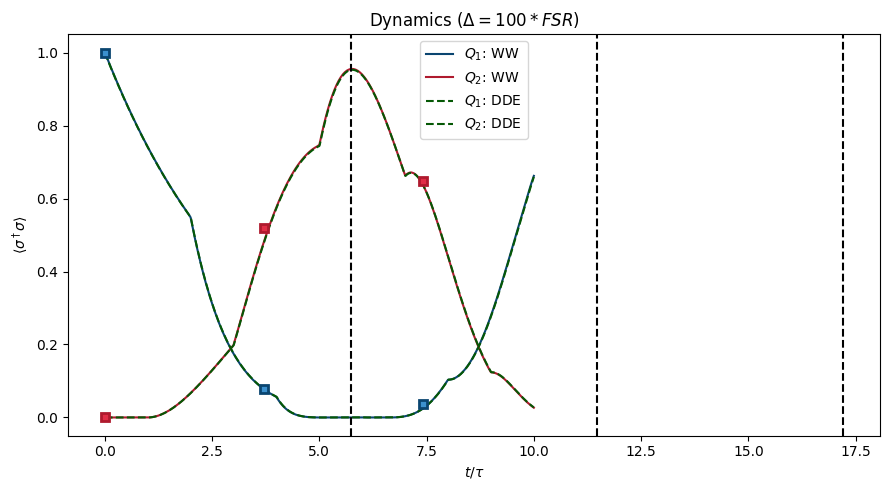

In [2]:
from expt_sets import expt_001_dynamics

expt_001_dynamics(
    Delta=100, gamma=0.3, tau=1, T=10, dt_max=0.01, n_steps=201, n_modes=100
)

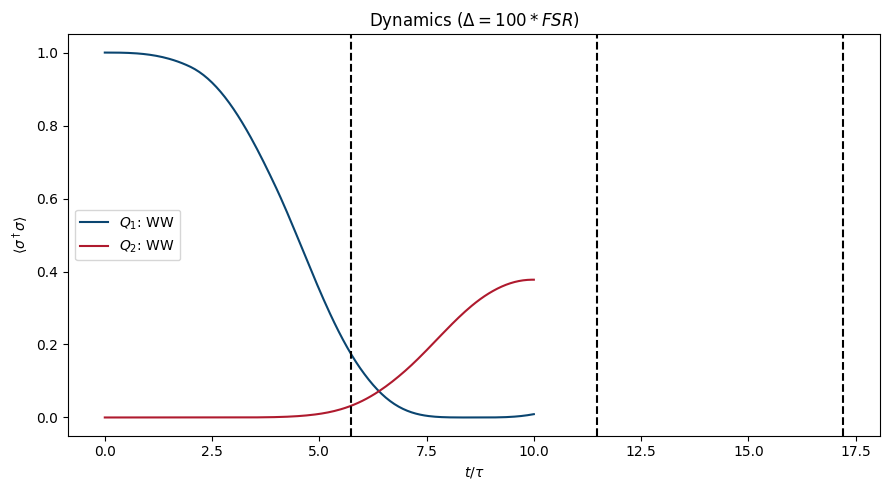

In [3]:
from expt_sets import expt_0011_dynamics

expt_0011_dynamics(
    Delta=100, gamma=0.3, tau=1, T=10, dt_max=0.01, n_steps=201, n_modes=100
)

# 2.SW Perturbation Convergence
We can use the perturbation theory to calculate the effective Hamiltonian,
\begin{align}
    H_{eff}^{(P)} = -\sum_{i,k} \frac{|g_{i,k}|^2}{\delta_k}\sigma_i^\dagger \sigma_i -\sum_k (\frac{g_{1,k}g_{2,k}}{\delta_k}\sigma_1^\dagger \sigma_2 +H.C) \notag
\end{align}
where
\begin{align}
    \sum_k^\infty (\frac{g_{1,k}g_{2,k}}{\delta_k}) = \frac{\pi  g^2} {FSR}  \csc(\frac{\pi  \delta}  {FSR}) \notag
\end{align}
So here I want test how the convergence of perturbation theory.

**Conclusion**:
- In the ideal limit, where the qubit frequency is sufficiently large and the number of waveguide modes coupled to the qubit is much enough, the perturbative result converges to a $csc$ function.


# 3. Swap speed and Fidelity
## 3.1 Study the speed and fidelity
Above, we found that two qubits can be passively swapped. 
Here, we will test the speed and fidelity of the swap.

**Conclusion** : 
- Because our DDE dynamics is piecewise-defined, if the Rabi frequency is not an integer multiple of τ, the position of the maximum fidelity in the DDE model will be mismatched and shifted relative to that in the Rabi model. This is why the speed follows the Rabi-frequency trend but exhibits oscillatory fluctuations, and also why the fidelity shows corresponding up-and-down variations.

In [ ]:
from expt_sets import expt_002_swapspeed
import numpy as np

gamma_list = np.logspace(np.log10(0.001), np.log10(0.3), 1000)
expt_002_swapspeed(
    Delta=0,
    gamma_list=gamma_list,
    force=True,
)

[compute] running parallel scan ...


## 3.2 Study the speed and fidelity for different peak
**Conclusion**: 
- There are not obviously different. So I think it is enough to only consider the first peak.

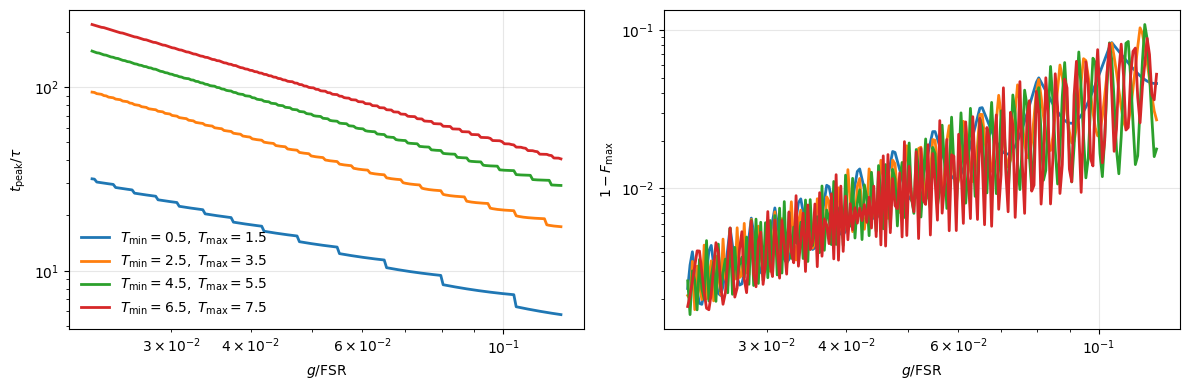

In [ ]:
from expt_sets import expt_003_compare_peaks
import numpy as np

expt_003_compare_peaks(
    Delta=0,
    gamma_list=np.logspace(np.log10(0.01), np.log10(0.3), 200),
    T_min_max_list=[
        (0.5, 1.5),
        (2.5, 3.5),
        (4.5, 5.5),
        (6.5, 7.5),
    ],
)


# 4. DDE with time-depending coupling

We need to test the performance of the DDE under time-dependent couplings and to compare quantum state transfer driven by time-dependent pulse control with passive state transfer based on constant-coupling swap schemes. Therefore, it is necessary to develop a DDE integrator that supports time-dependent couplings.
**Conclusion**:
- Test the stirap protcol with $g_1 = g_0 \sin (\pi t/T ), g_2 = g_0 \cos (\pi t/T )$
- Test the pulse with delay
\begin{align}
g_1(t)=&
\begin{cases}
g_0 \sin (\pi t/T ), & t>T \\
g_0, & t\le 0
\end{cases}\\
g_2(t)=&
\begin{cases}
g_0 , & t\le \tau \\
g_0\cos (\pi t/T ), & t\ge \tau
\end{cases}\\
\end{align}


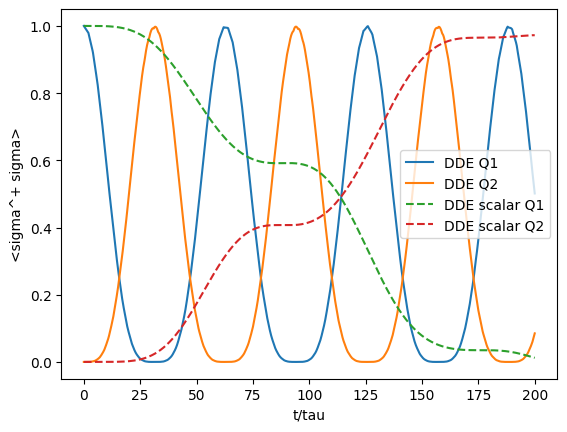

np.float64(0.9723429766021396)

In [ ]:
from expt_sets import expt_004_stirap

expt_004_stirap(T=200.0, gamma=0.01, dt_max=0.01, phi=0)

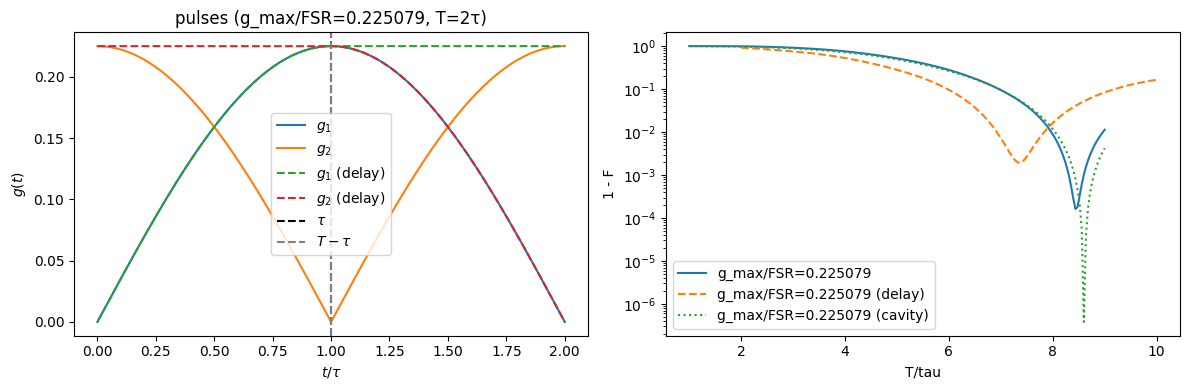

In [ ]:
from expt_sets import expt_005_stirap_T_scan
import numpy as np

T_list = np.linspace(2, 10, 200)
_, _, _ = expt_005_stirap_T_scan(gamma=1, T_list=T_list, phi=0.0, tau=1.0, dt_max=0.01)

[warn] only 1/4 valleys found (no-delay).
[warn] only 1/4 valleys found (delay).


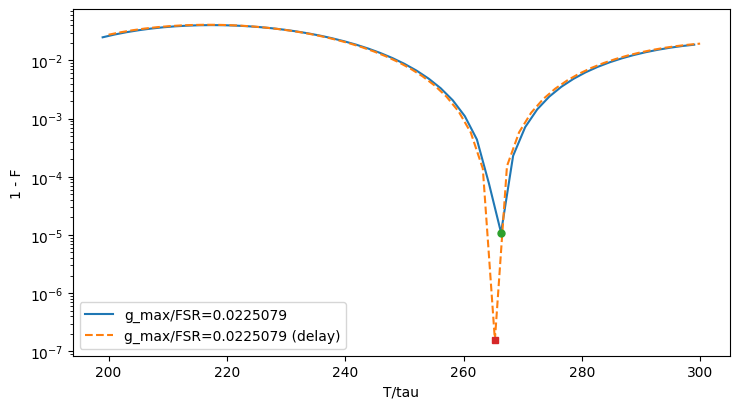

In [ ]:
from expt_sets import expt_006_FindPeak
import numpy as np

gamma = 0.01
T_list = np.linspace(20 / np.sqrt(gamma), 30 / np.sqrt(gamma), 50)
result = expt_006_FindPeak(gamma, T_list)

[warn] only 1/4 valleys found (no-delay).
[warn] only 1/4 valleys found (delay).


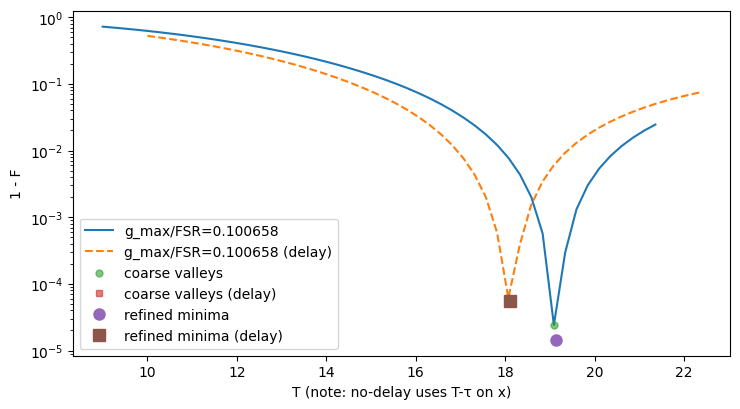

In [ ]:
from expt_sets import expt_007_RefinePeak
import numpy as np

gamma = 0.2
T_list = np.linspace(10, 10 / np.sqrt(gamma), 50)
_, _, _, _ = expt_007_RefinePeak(gamma=gamma, T_list=T_list, halfwidth=5)

In [ ]:
from expt_sets import expt_008_ScanGamma_Refined
import numpy as np

gamma_list = np.logspace(np.log10(0.001), np.log10(1), 600)
expt_008_ScanGamma_Refined(
    gamma_list, cache_file="expt_008_cache111.npz", force=False, n_jobs=30
)

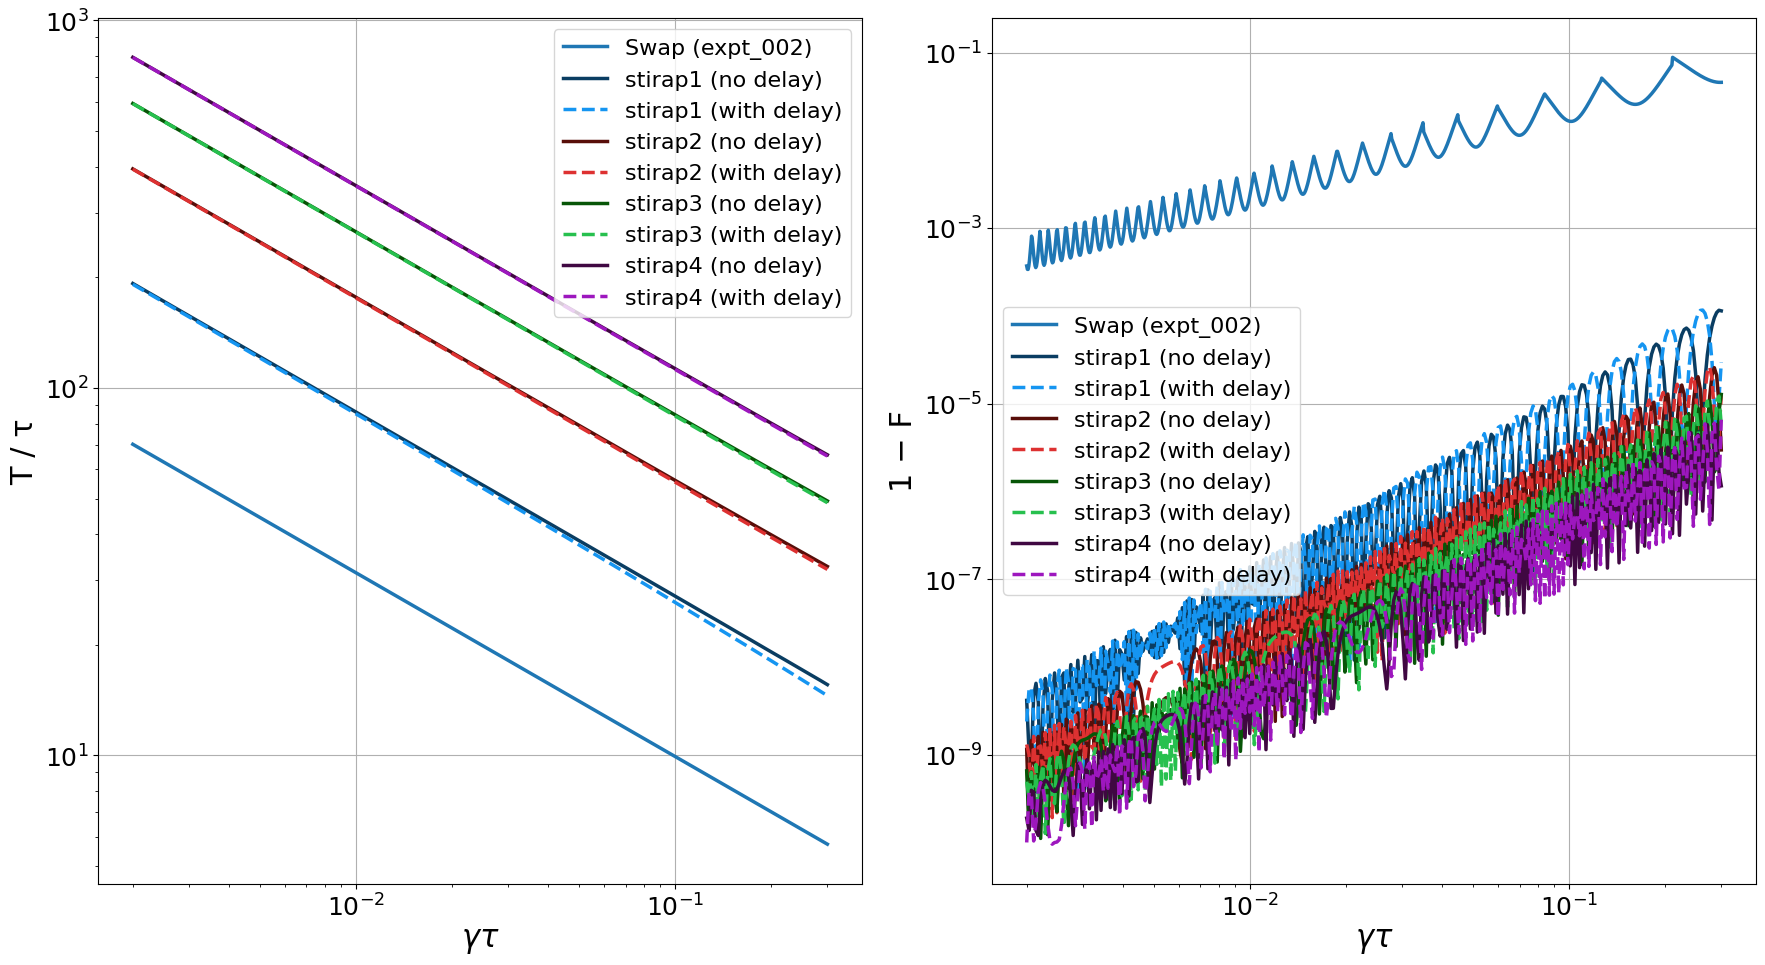

In [ ]:
from expt_sets import plot_expt_002_and_008

plot_expt_002_and_008(
    data0="expt_002_cache.npz",
    data1="expt_008_cache1.npz",
    data2="expt_008_cache2.npz",
    data3="expt_008_cache3.npz",
    data4="expt_008_cache4.npz",
    tau=1.0,
)

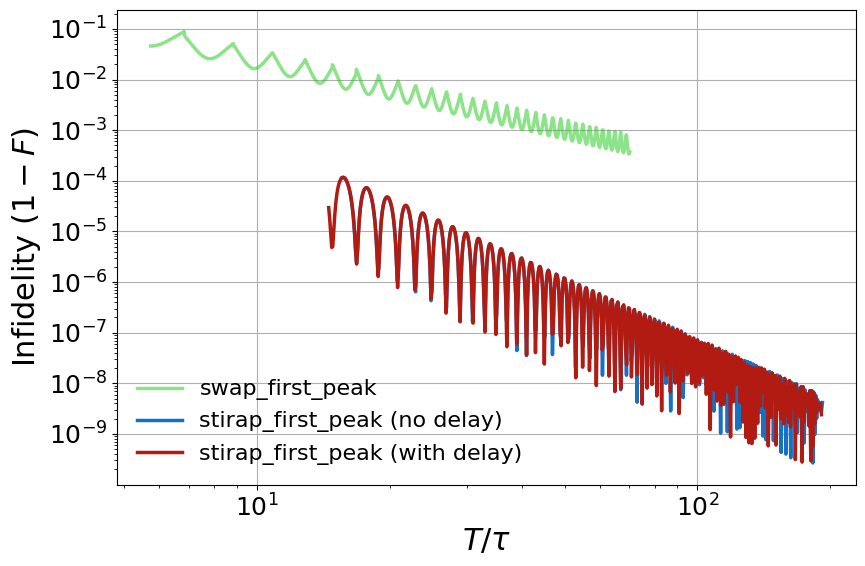

In [ ]:
from expt_sets import plot_optimal_TF

plot_optimal_TF(
    data0="expt_002_cache.npz",
    data1="expt_008_cache11.npz",
    data2="expt_008_cache2.npz",
    data3="expt_008_cache3.npz",
    data4="expt_008_cache4.npz",
    tau=1.0,
)

0.018909001794615476


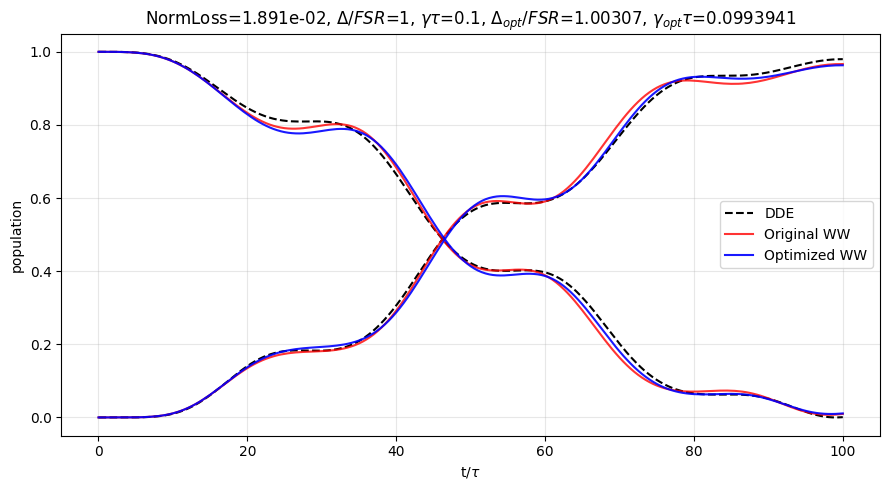

In [1]:
from expt_sets import optimize_gamma_and_phi

loss_opt, Delta_opt, gamma_opt = optimize_gamma_and_phi(
    gamma_guess=0.1,
    T=100.0,
    Delta_guess=1,
    tau=1.0,
    dt_max=0.01,
    delay=True,
    PBC=True,
    n_modes=101,
    n_steps=201,
    plot=True,
    opt=True,
)

0.008686967119411968


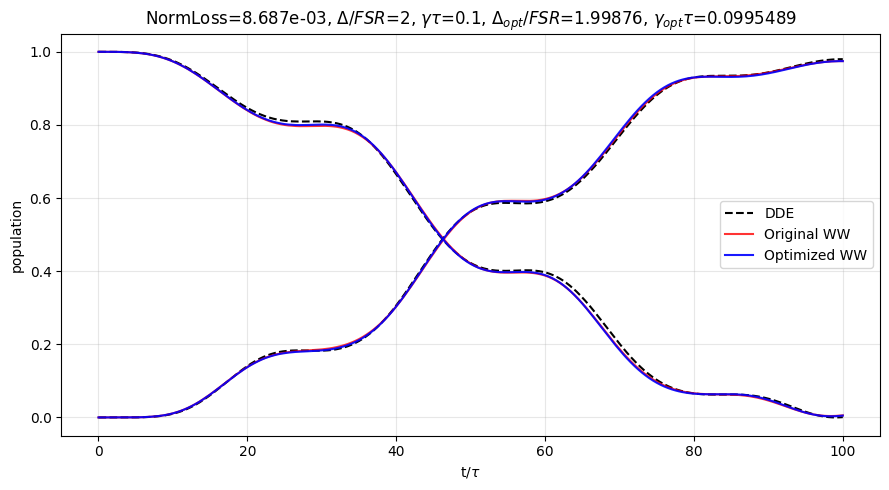

In [2]:
from expt_sets import optimize_gamma_and_phi

loss_opt, Delta_opt, gamma_opt = optimize_gamma_and_phi(
    gamma_guess=0.1,
    T=100.0,
    Delta_guess=2,
    tau=1.0,
    dt_max=0.01,
    delay=True,
    PBC=True,
    n_modes=101,
    n_steps=201,
    plot=True,
    opt=True,
)

0.020414516063333662


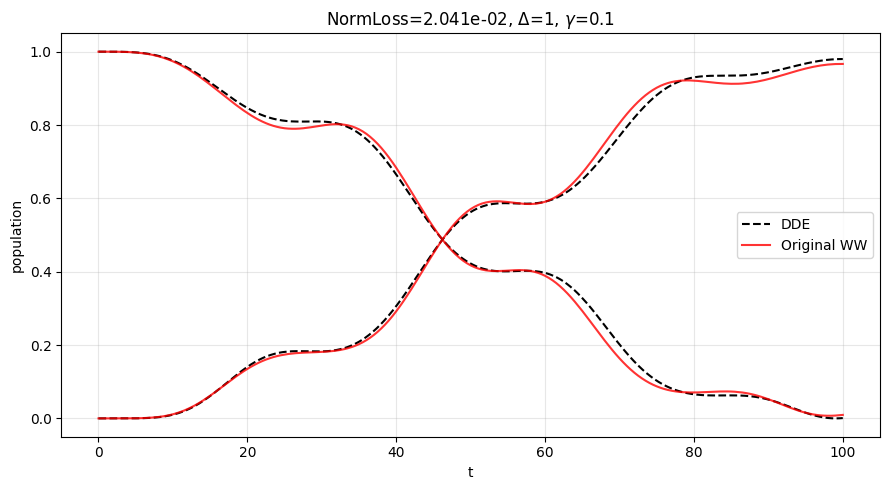

In [2]:
from expt_sets import optimize_gamma_and_phi

loss_opt, Delta_opt, gamma_opt = optimize_gamma_and_phi(
    gamma_guess=0.1,
    T=100.0,
    Delta_guess=1,
    tau=1.0,
    dt_max=0.01,
    delay=True,
    n_modes=101,
    n_steps=201,
    plot=True,
    opt=False,
)